In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\arkha\cancer_stats_project\CRUK_EDHub_IncidenceByStageRCRD_DataTable2025-09-28.csv")
print(df.head())
print(df.info())
print(df.describe())

         Date           Cancer Site          Stage  Observed Count  \
0  2025-05-01  All Cancers Combined        Stage I            6252   
1  2025-05-01  All Cancers Combined       Stage II            3373   
2  2025-05-01  All Cancers Combined      Stage III            3171   
3  2025-05-01  All Cancers Combined       Stage IV            3239   
4  2025-05-01  All Cancers Combined  Unknown stage            5724   

   Proportion (where stage known)  Proportion of total  Rolling Average  \
0                        0.389897             0.287329      7174.250000   
1                        0.210352             0.155016      3903.333333   
2                        0.197755             0.145733      3777.916667   
3                        0.201996             0.148858      3816.500000   
4                             NaN             0.263064      4090.916667   

   Rolling Proportion  LowerCI (rolling average)  Upper (rolling average)  
0            0.315173                        NaN    

 **Transform columns: date to datetime, normalize categorical columns, deal with missing data**


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month  
print(df.head())

        Date           Cancer Site          Stage  Observed Count  \
0 2025-05-01  All Cancers Combined        Stage I            6252   
1 2025-05-01  All Cancers Combined       Stage II            3373   
2 2025-05-01  All Cancers Combined      Stage III            3171   
3 2025-05-01  All Cancers Combined       Stage IV            3239   
4 2025-05-01  All Cancers Combined  Unknown stage            5724   

   Proportion (where stage known)  Proportion of total  Rolling Average  \
0                        0.389897             0.287329      7174.250000   
1                        0.210352             0.155016      3903.333333   
2                        0.197755             0.145733      3777.916667   
3                        0.201996             0.148858      3816.500000   
4                             NaN             0.263064      4090.916667   

   Rolling Proportion  LowerCI (rolling average)  Upper (rolling average)  \
0            0.315173                        NaN         

In [7]:
print(df['Stage'].unique())

['Stage I' 'Stage II' 'Stage III' 'Stage IV' 'Unknown stage' 'Total'
 'TotalKnown' 'Early stages (I+II)' 'Late stages (III+IV)']


In [8]:
print(df['Cancer Site'].unique())

['All Cancers Combined'
 'All Cancers Combined (excluding Lung and Prostate)'
 'All Cancers Combined (excluding Lung)'
 'All Cancers Combined (excluding Prostate)' 'Bladder' 'Blood' 'Bowel'
 'Breast' 'Cervical' 'Gynaecological' 'Hodgkin Lymphoma' 'Kidney' 'Lung'
 'Melanoma Skin' 'Non-Hodgkin Lymphoma' 'Oesophageal' 'Oesophago-gastric'
 'Ovarian' 'Pancreatic' 'Prostate' 'Stomach' 'Urological excl prostate'
 'Uterine']


In [9]:
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
print(df['Year'].value_counts())

Year
2024    2484
2023    2484
2022    2484
2021    2484
2019    2484
2020    2484
2025    1035
2018     207
Name: count, dtype: int64


Normalize later by converting to proportions as data for 2018 and 2025 is incomplete

In [10]:
print(df['Stage'].value_counts())
print(df['Cancer Site'].value_counts())

Stage
Stage I                 1794
Stage II                1794
Stage III               1794
Stage IV                1794
Unknown stage           1794
Total                   1794
TotalKnown              1794
Early stages (I+II)     1794
Late stages (III+IV)    1794
Name: count, dtype: int64
Cancer Site
All Cancers Combined                                  702
All Cancers Combined (excluding Lung and Prostate)    702
All Cancers Combined (excluding Lung)                 702
All Cancers Combined (excluding Prostate)             702
Bladder                                               702
Blood                                                 702
Bowel                                                 702
Breast                                                702
Cervical                                              702
Gynaecological                                        702
Hodgkin Lymphoma                                      702
Kidney                                                702

#** **These categorical data columns are consistent ****

*Plot of categorical data across time*

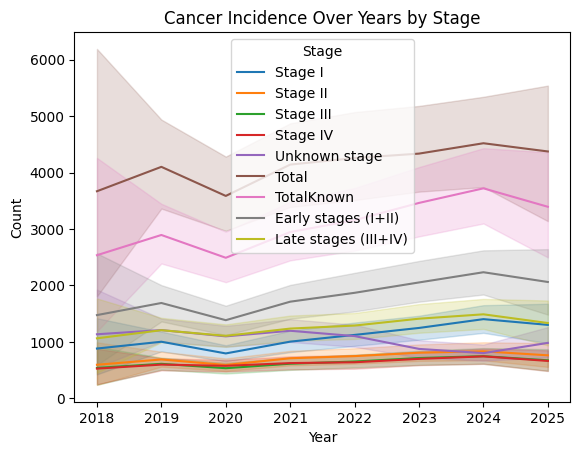

In [11]:
sns.lineplot(data=df, x='Year', y='Observed Count', hue='Stage')
plt.title('Cancer Incidence Over Years by Stage')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Stage')
plt.show()

To remove the skew due to total of stages being so much greater re-plot with select stages

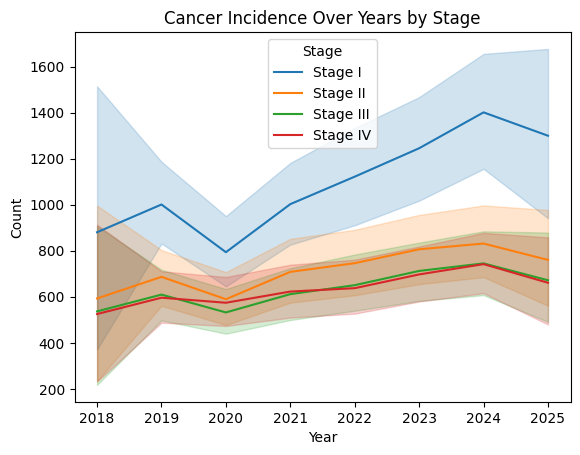

In [12]:
select_stages = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']
df_filtered = df[df['Stage'].isin(select_stages)]
sns.lineplot(data=df_filtered, x='Year', y='Observed Count', hue='Stage')
plt.title('Cancer Incidence Over Years by Stage')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Stage')
plt.show()

This clearly shows that over the years the incidence of stage I has increased probably due to early diagnosis improving.  
The dip at 2018 and 2025 is due to less months for data colllection and in 2020 COVID-19  lockdown

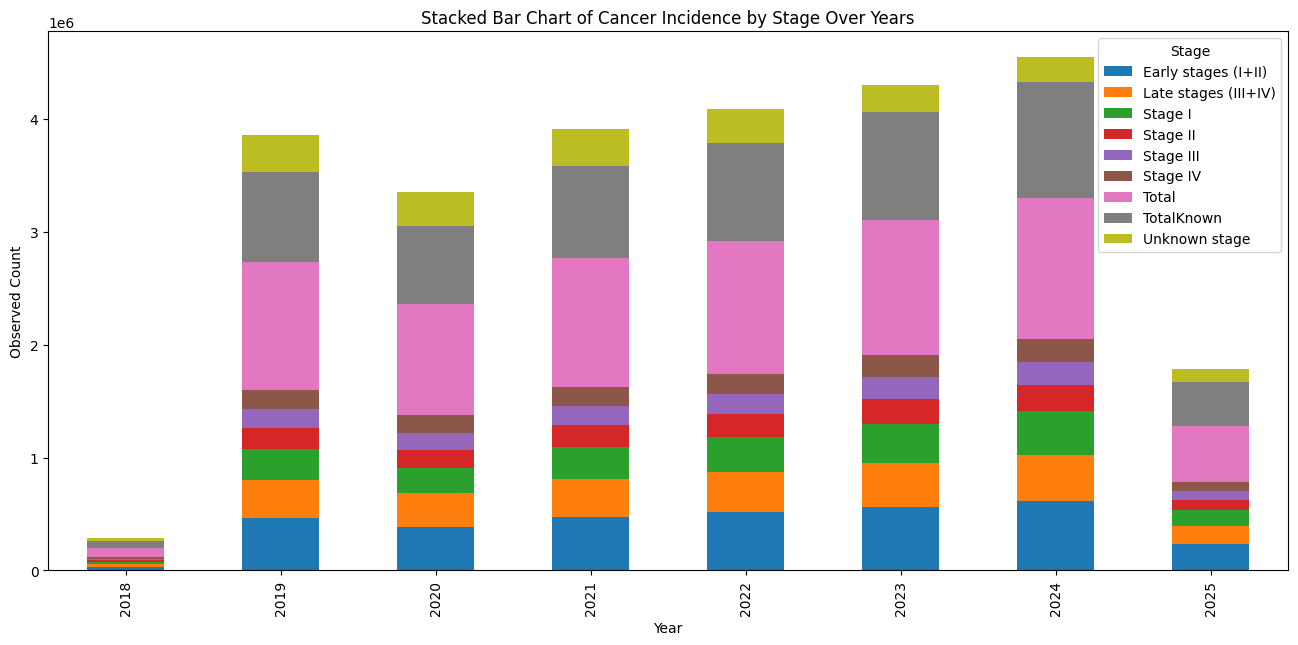

In [13]:
incidence_by_stage = df.groupby(['Year', 'Stage'])['Observed Count'].sum().unstack()
incidence_by_stage.plot(kind='bar', stacked=True, figsize=(16, 7))
plt.title('Stacked Bar Chart of Cancer Incidence by Stage Over Years')
plt.xlabel('Year')
plt.ylabel('Observed Count')   
plt.legend(title='Stage')
plt.show()

*Barplot with stages filtered to remove rows with totals for stages and unknown*


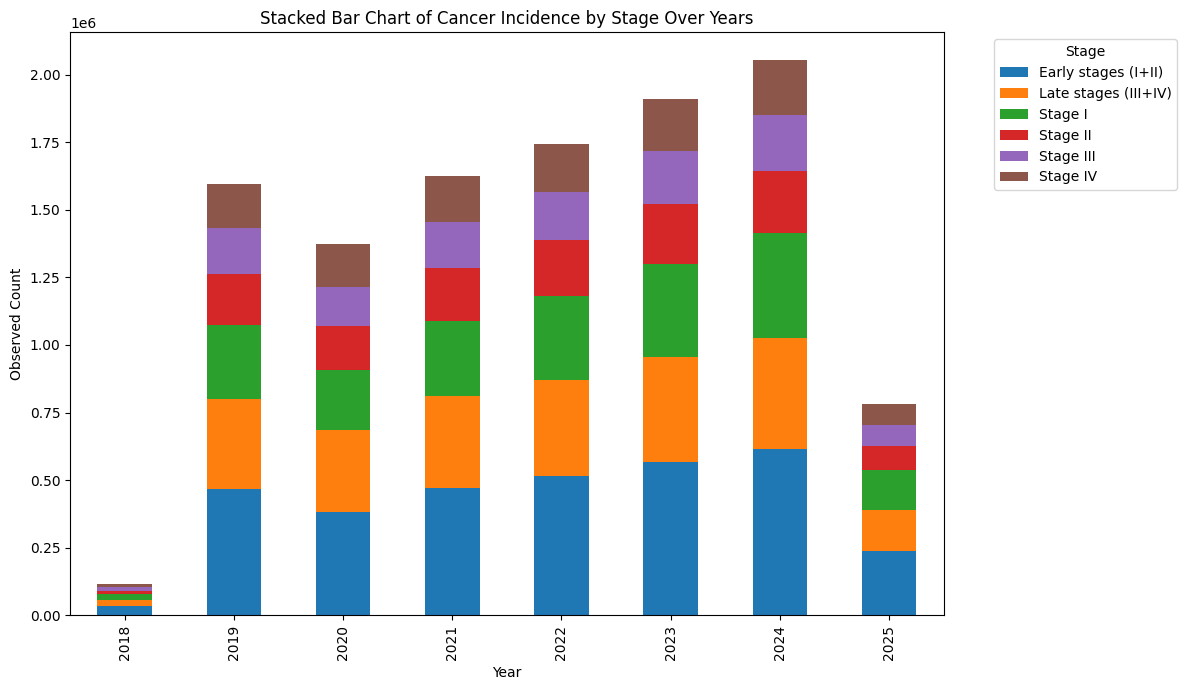

In [14]:
df_excluding_totals = df[~df['Stage'].isin(['TotalKnown', 'Total', 'Unknown stage'])] #tilda sign reverses the code
# Pivot the data
pivot_df = df_excluding_totals.pivot_table(
    index='Year',
    columns='Stage',
    values='Observed Count',
    aggfunc='sum')

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Stacked Bar Chart of Cancer Incidence by Stage Over Years')
plt.xlabel('Year')
plt.ylabel('Observed Count')
plt.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

***Now looking at the incidence per stage for the cancer sites across years***

In [15]:
df_stages_for_site=df.groupby(['Year', 'Cancer Site','Stage'])['Observed Count'].sum().unstack()
print(df_stages_for_site.head())

Stage                                                    Early stages (I+II)  \
Year Cancer Site                                                               
2018 All Cancers Combined                                               7255   
     All Cancers Combined (excluding Lung and Prostate)                 5302   
     All Cancers Combined (excluding Lung)                              6600   
     All Cancers Combined (excluding Prostate)                          5957   
     Bladder                                                             289   

Stage                                                    Late stages (III+IV)  \
Year Cancer Site                                                                
2018 All Cancers Combined                                                5763   
     All Cancers Combined (excluding Lung and Prostate)                  2928   
     All Cancers Combined (excluding Lung)                               4117   
     All Cancers Combined (excludi

In [16]:
print(df_stages_for_site.columns)

Index(['Early stages (I+II)', 'Late stages (III+IV)', 'Stage I', 'Stage II',
       'Stage III', 'Stage IV', 'Total', 'TotalKnown', 'Unknown stage'],
      dtype='object', name='Stage')


*Bar charts : Total incidence at each stage of cancers combined over the years 2018 to 2015 (less months of records for 2018 and 2025)*

In [17]:
# Select all cancer sites that include "All Cancers Combined"
combined_mask = df_stages_for_site.index.get_level_values('Cancer Site').str.contains("All Cancers Combined", case=False) #returns a Boolean mask(array) of case= True and ignores case=false

# Split the data
df_combined = df_stages_for_site[combined_mask]
df_individual = df_stages_for_site[~combined_mask]

print(df_combined.head())
print(df_individual.head())


Stage                                                    Early stages (I+II)  \
Year Cancer Site                                                               
2018 All Cancers Combined                                               7255   
     All Cancers Combined (excluding Lung and Prostate)                 5302   
     All Cancers Combined (excluding Lung)                              6600   
     All Cancers Combined (excluding Prostate)                          5957   
2019 All Cancers Combined                                              99541   

Stage                                                    Late stages (III+IV)  \
Year Cancer Site                                                                
2018 All Cancers Combined                                                5763   
     All Cancers Combined (excluding Lung and Prostate)                  2928   
     All Cancers Combined (excluding Lung)                               4117   
     All Cancers Combined (excludi

*Cannot view the difference between the two dataframes so increasing view in display*
Expand width so view does not wrapto new line so often

In [18]:
import pandas as pd

# Display more columns
pd.set_option('display.max_columns', 100)

# Set max column width for each column
pd.set_option('display.max_colwidth', None)

# Set width for the display
pd.set_option('display.width', 200)  


In [19]:
print(df_combined.head())
print(df_individual.head())

Stage                                                    Early stages (I+II)  Late stages (III+IV)  Stage I  Stage II  Stage III  Stage IV   Total  TotalKnown  Unknown stage
Year Cancer Site                                                                                                                                                             
2018 All Cancers Combined                                               7255                  5763     4383      2872       2875      2888   18468       13018           5450
     All Cancers Combined (excluding Lung and Prostate)                 5302                  2928     3031      2271       1559      1369   12219        8230           3989
     All Cancers Combined (excluding Lung)                              6600                  4117     3925      2675       2340      1777   15715       10717           4998
     All Cancers Combined (excluding Prostate)                          5957                  4574     3489      2468       2094  

It can be seen that the df_individual lacks 'All Cancers Combined' vs df_combined

Plot using df_combined

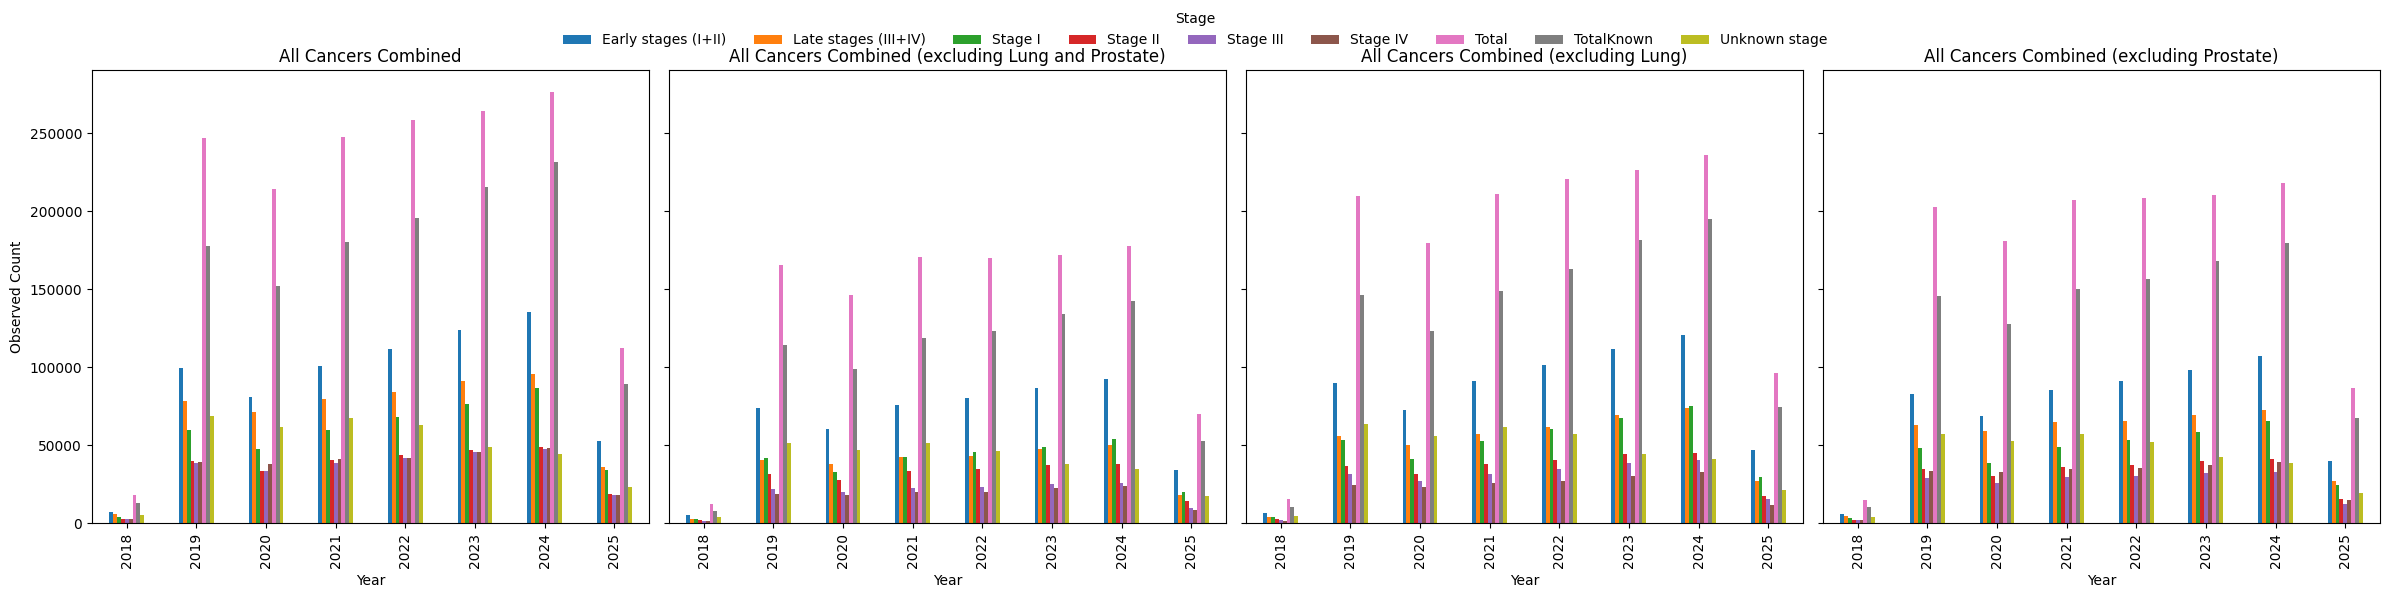

In [20]:

# Get unique Cancer Site names in df_combined
combined_sites = df_combined.index.get_level_values('Cancer Site').unique()
num_sites = len(combined_sites)

# Set layout
ncols = 4
nrows = -(-num_sites // ncols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 6 * nrows), sharey=True)
axes = axes.flatten()

#  Loop over unique site names
for i, site in enumerate(combined_sites):
    site_data = df_combined.xs(site, level='Cancer Site')
    site_data.plot(kind='bar', ax=axes[i], legend=False)
    axes[i].set_title(site)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Observed Count')


# Shared legend from first plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Stage', loc='upper center', ncol=len(labels), frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Plot using df_individual

*Removing Totals, unknowns total, Early and Late stages combined from stages so that the difference between the individual stages can be seen more clearly*

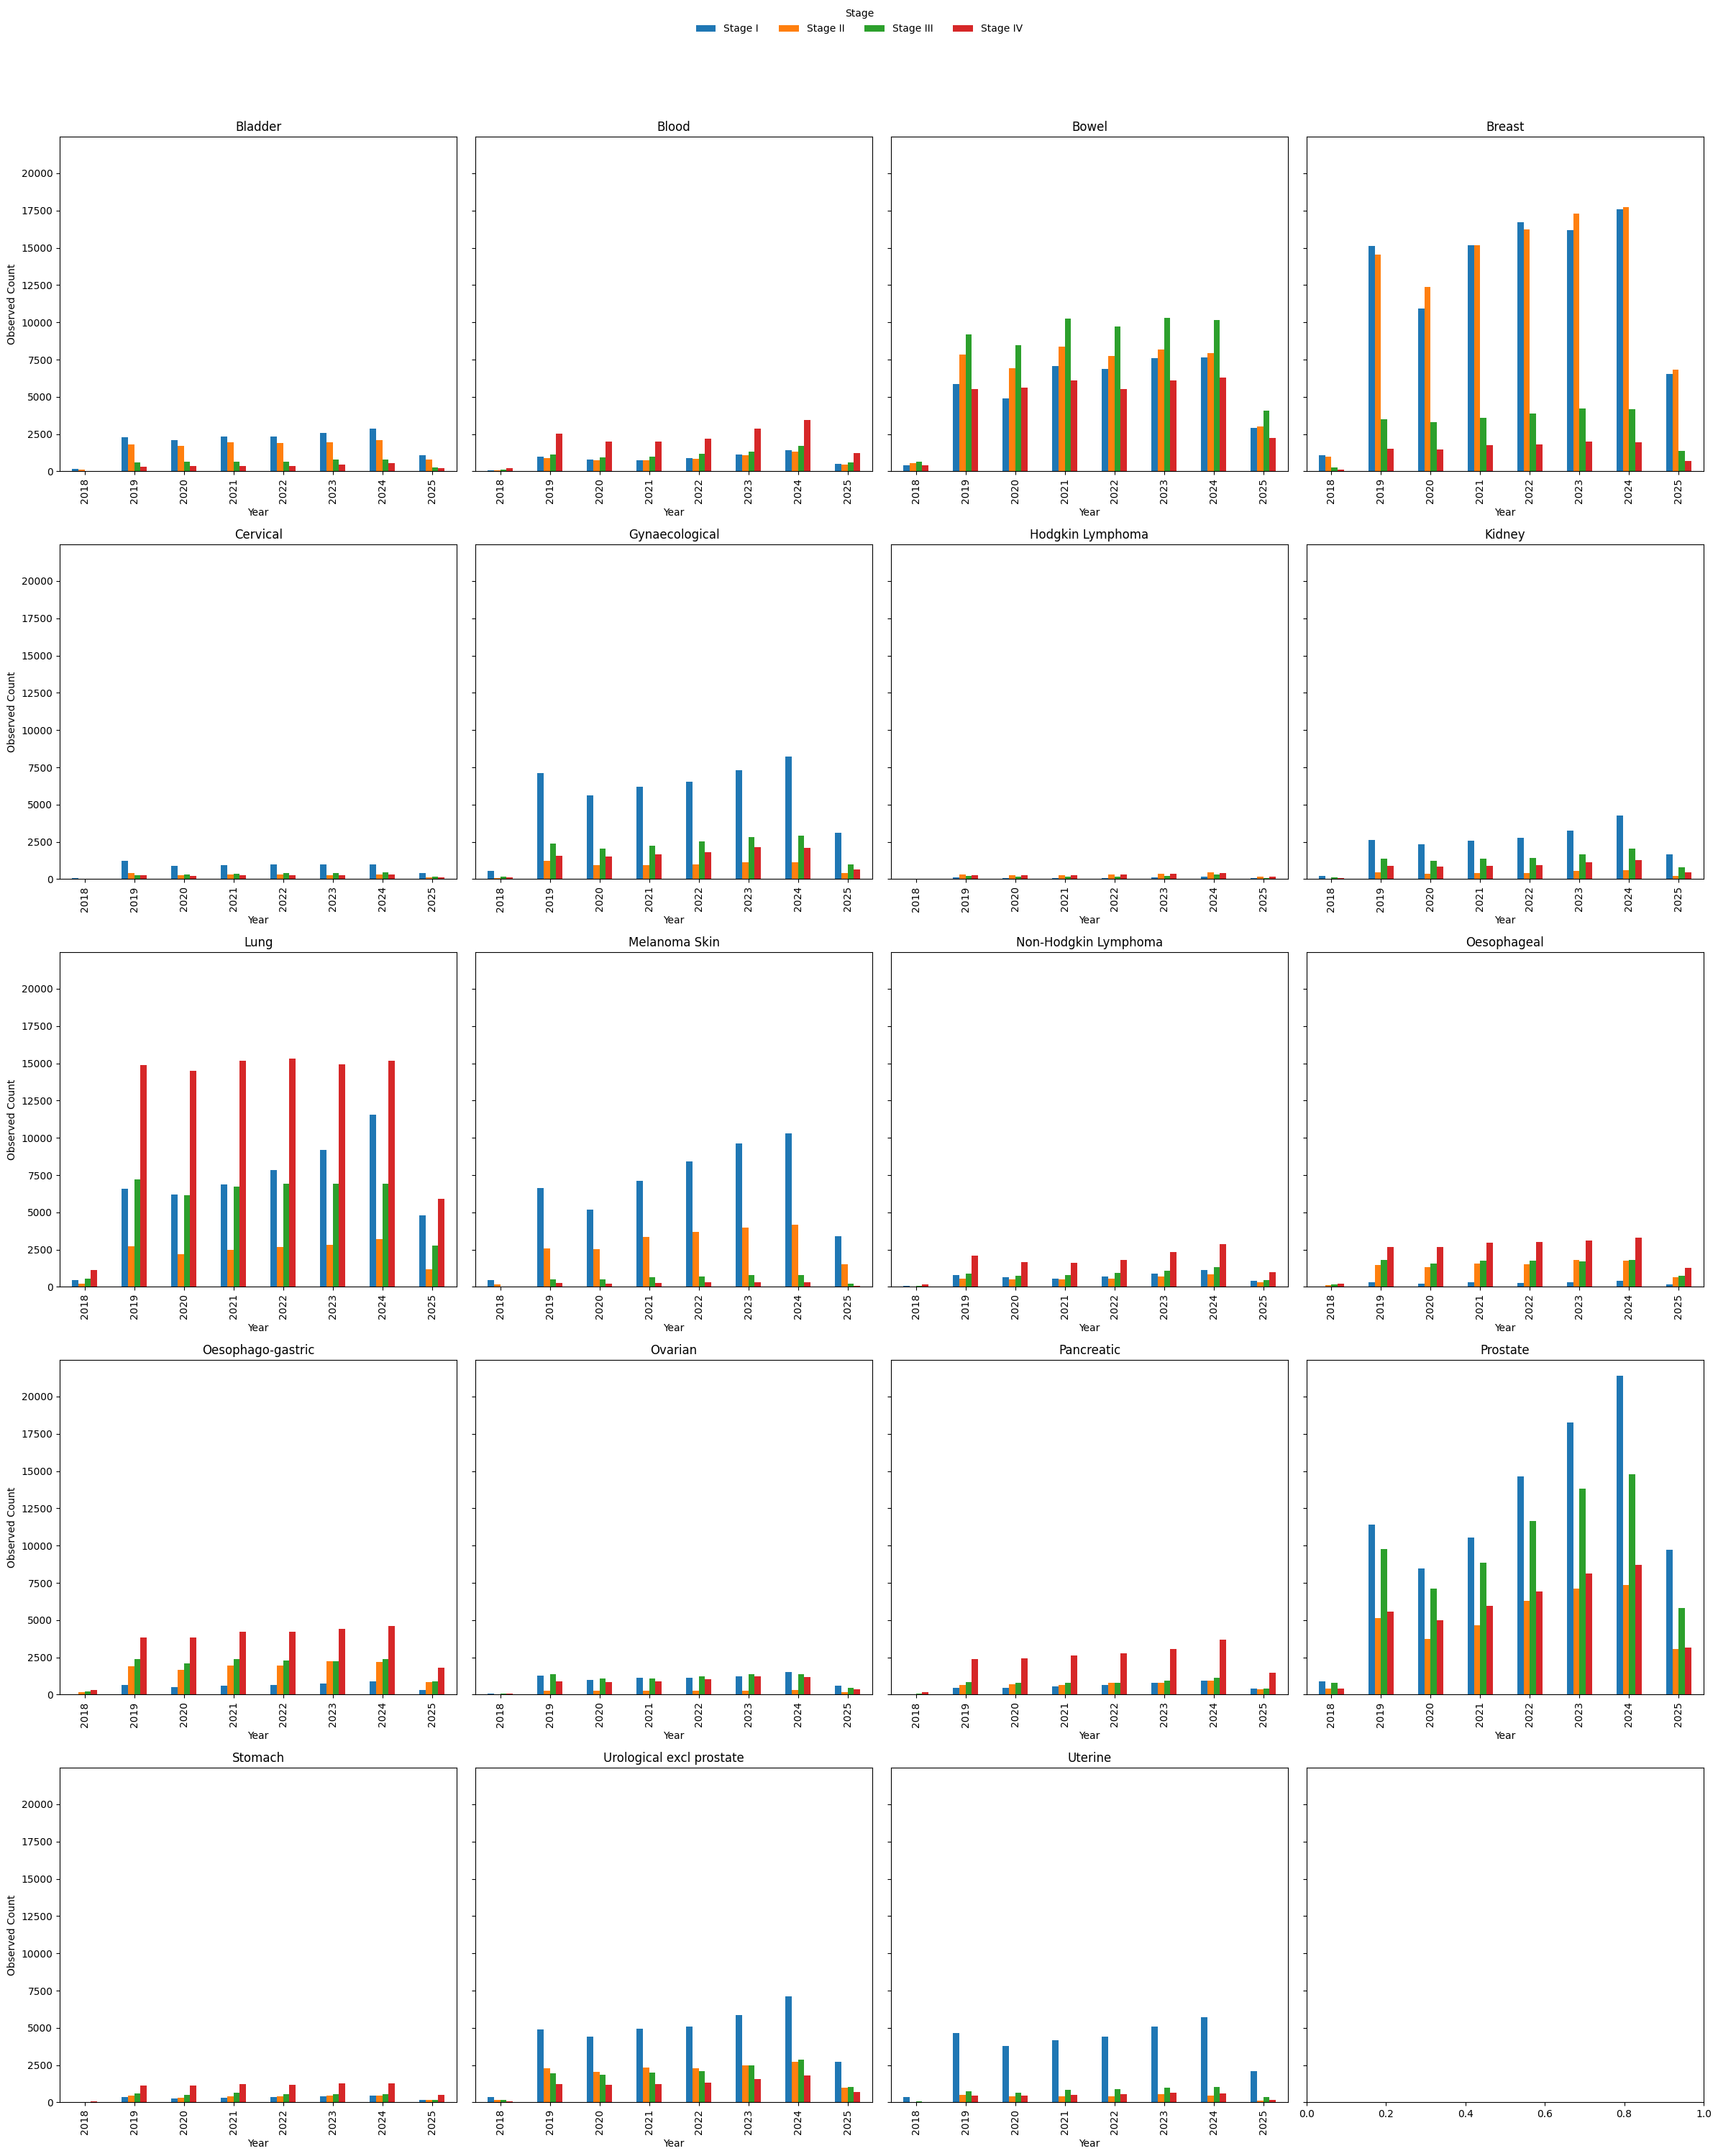

In [21]:


# Get individual cancer sites in df_individual
individual_sites = df_individual.index.get_level_values('Cancer Site').unique()
num_sites = len(individual_sites)

# Set number of columns and number of rows
ncols = 4
nrows = -(-num_sites // ncols)  # Same as math.ceil(num_sites / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 6 * nrows), sharey=True)
axes = axes.flatten()

# Plot each Cancer Site excluding totals, unknowns and combined stages
for i, site in enumerate(individual_sites):
    site_data = df_individual.xs(site, level='Cancer Site')
    stages_to_exclude = ['Total', 'TotalKnown', 'Unknown stage', 'Early stages (I+II)', 'Late stages (III+IV)']
    site_data = site_data.drop(columns=stages_to_exclude, errors='ignore')
    site_data.plot(kind='bar', ax=axes[i], legend=False)  # Disable legend in each subplot
    axes[i].set_title(site)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Observed Count')


# Create a single shared legend from the one of the subplots here (handles come from first subplot axes=0)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Stage', loc='upper center', ncol=len(labels), frameon=False)

# Tidy layout with room for top legend
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**There are less observations for 2018 and 2025**
1) <5000 incidence for all stages: Hodgkin's Lymphoma, Cervical, Ovarian, Stomach, Non-Hodjkins, Pancreatic, Oesophogeal, Pancreatic, Kidney, Bladder, Blood and Oeasophageal_Gastric. Incidence doesnt appear to change much over the years.
2) <7000 incidence for Uterine, Gyanecaological, Urological+Pancreatic and Melanoma skin.
2) Of the <5000 incidence cancers it is clear that incidence of IV stage cancer is higher for Stomach, Oesophageal, Oesophageal+Gastric, Pancreatic, Non-Hodjkins Lymphoma and Blood and this has not changed over the years.
3) Of the <7000 incidence there is clearly, a higher incidence of stage I.

4)  >10,000 incidences for Bowel, Breast, Lung and Prostrate cancers. 
5) Of these high incidence cancers there is:
     -much higher incidence of stage I and II for Breast cancer which is slightly increasing with years
     -similar incidences for Bowel cancer except a slightly lower incidence of stage IV
     -much higher incidence of Stage I and III in Prostrate cancer, which clearly increasing with years
     -much higher incidence of stage IV in Lung cancer.

***Would be interesting to look at relative proportions of the stages for the cancers***

In [22]:
#  stage columns to include in the proportions
stages_to_include = ['Stage I', 'Stage II', 'Stage III', 'Stage IV'] 

# Step 2: Create the proportions DataFrame
df_stage_props = df_stages_for_site[stages_to_include].div(df_stages_for_site['TotalKnown'], axis=0)

print(df_stage_props.head())


Stage                                                     Stage I  Stage II  Stage III  Stage IV
Year Cancer Site                                                                                
2018 All Cancers Combined                                0.336688  0.220618   0.220848  0.221847
     All Cancers Combined (excluding Lung and Prostate)  0.368287  0.275942   0.189429  0.166343
     All Cancers Combined (excluding Lung)               0.366241  0.249603   0.218345  0.165811
     All Cancers Combined (excluding Prostate)           0.331308  0.234356   0.198842  0.235495
     Bladder                                             0.459302  0.380814   0.110465  0.049419


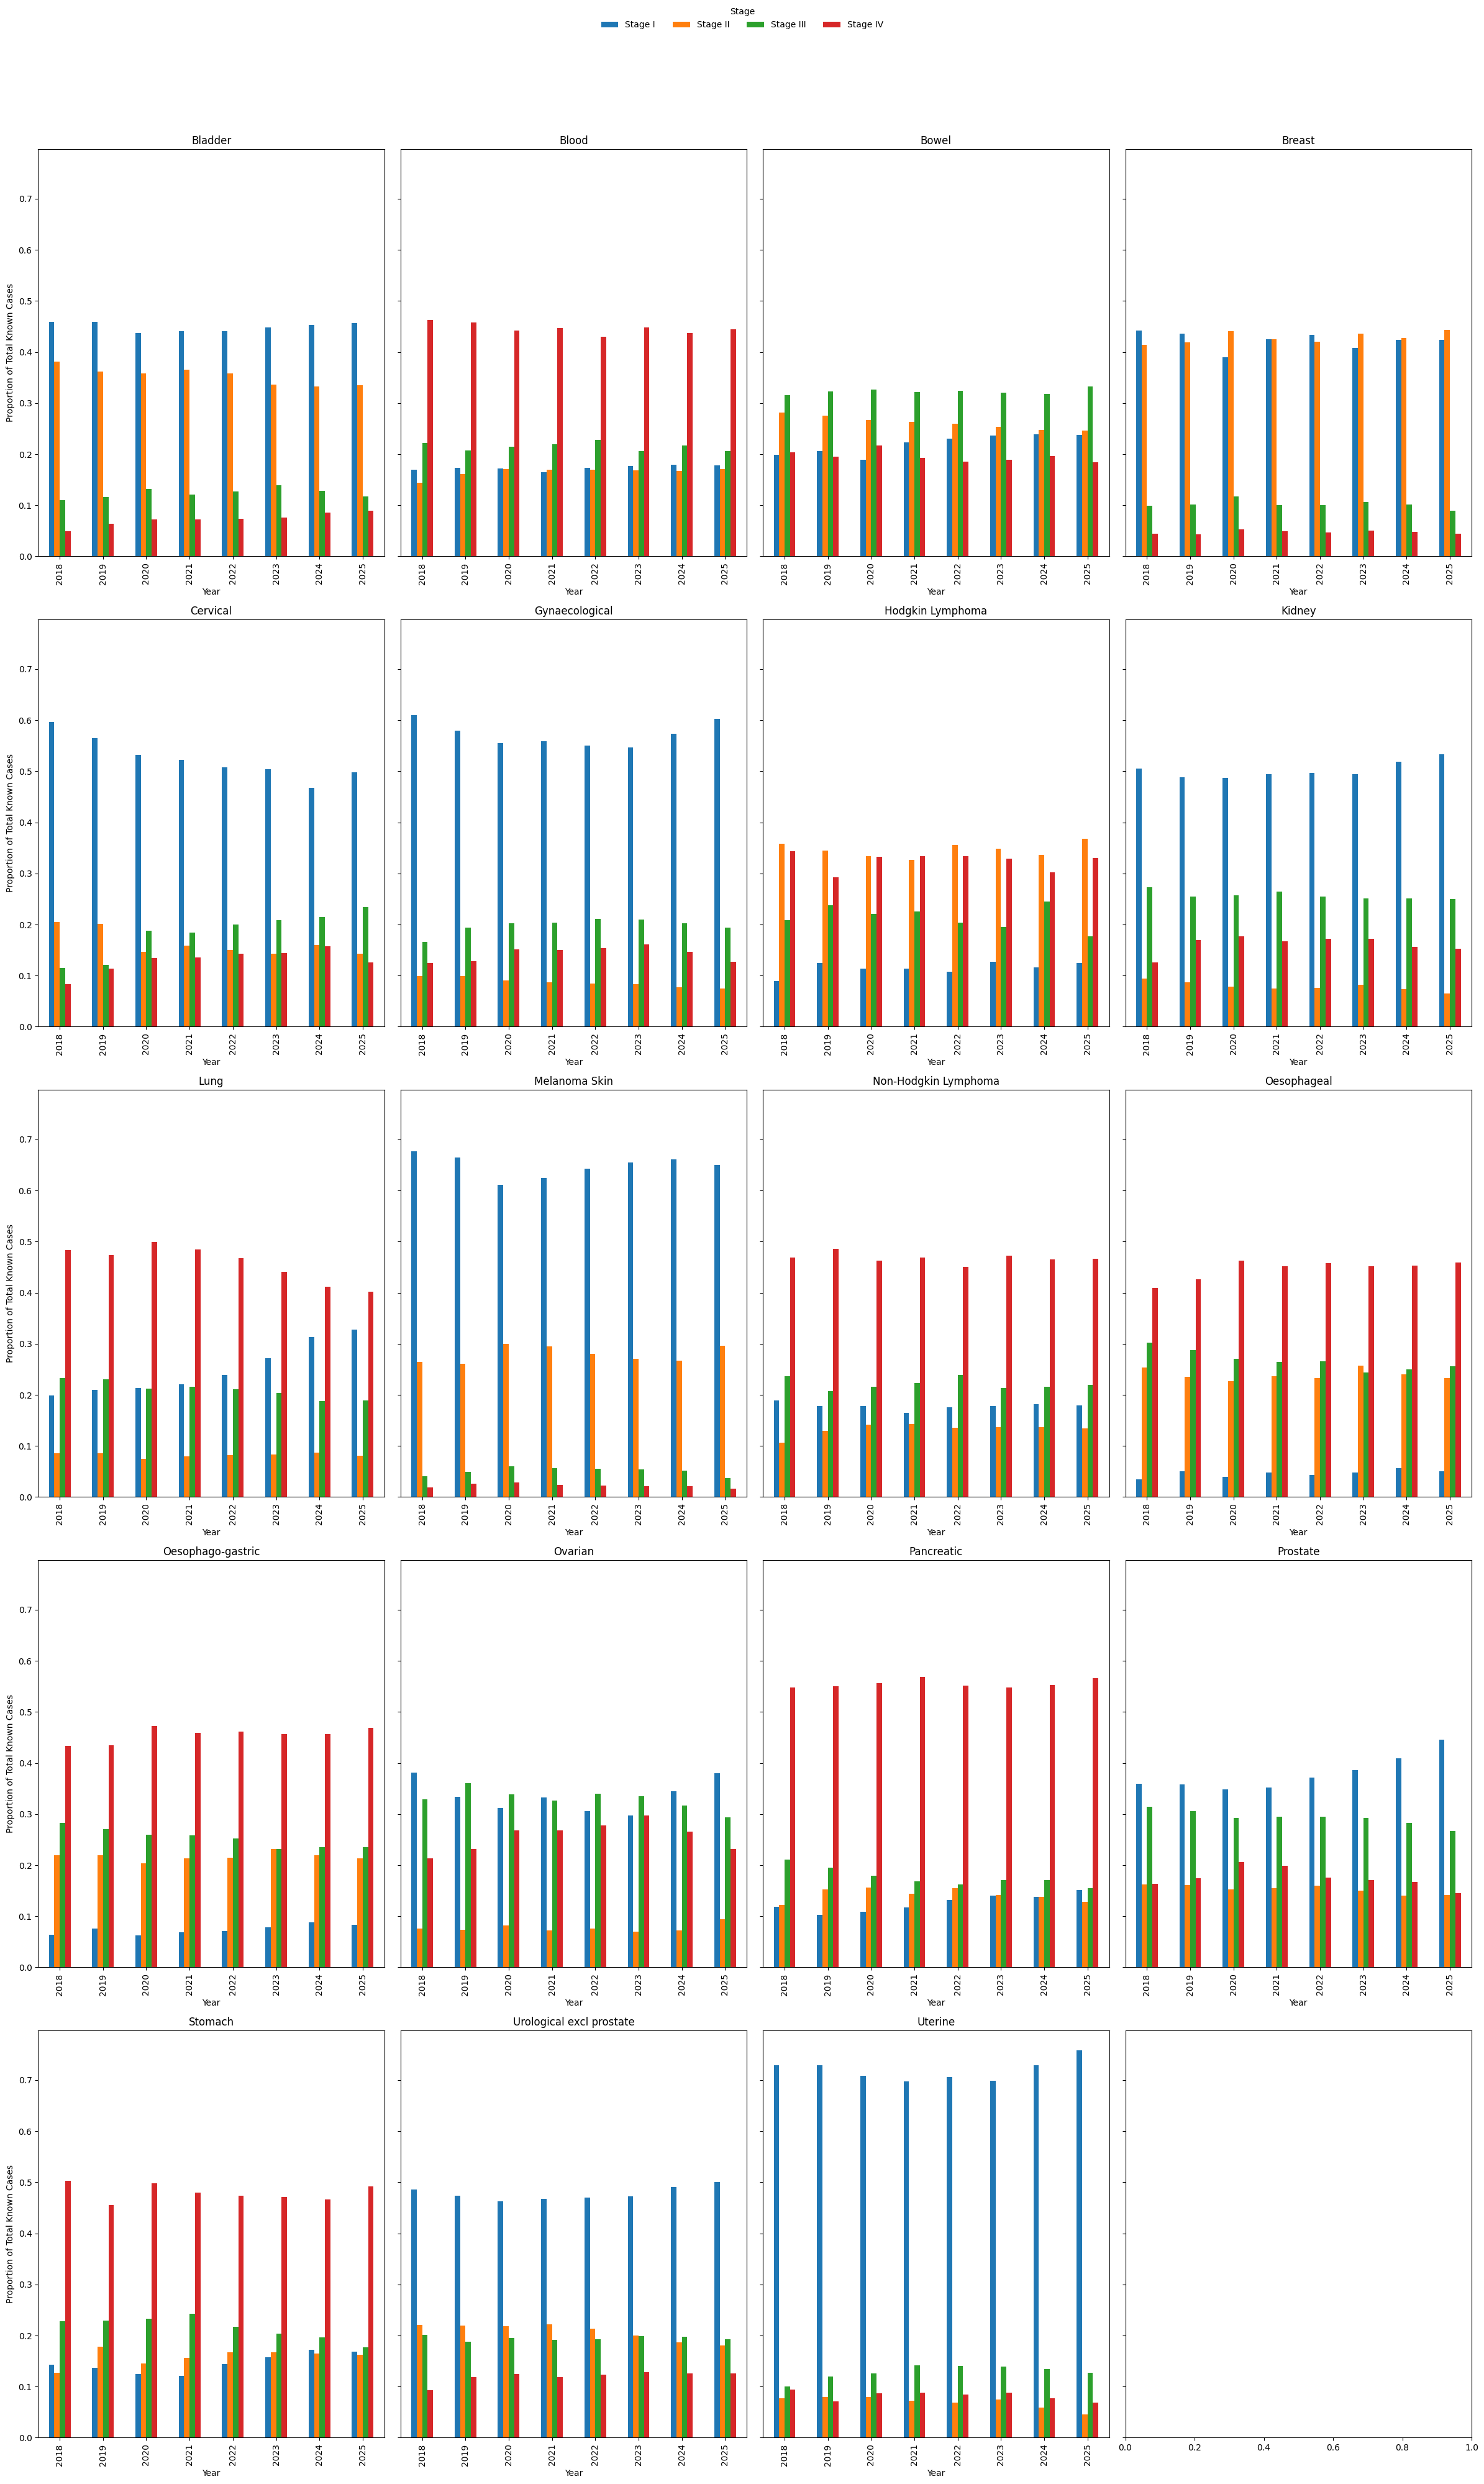

In [23]:
fig, axes= plt.subplots(5,4,figsize=(24,40), sharey=True)
axes = axes.flatten()
for i, site in enumerate(individual_sites):
    site_data = df_stage_props.xs(site, level='Cancer Site') #.xs() cross section selects a particular level of a MultiIndex.
    site_data.plot(kind='bar', ax=axes[i], legend=False)  # Disable legend in each subplot
    axes[i].set_title(site)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Proportion of Total Known Cases')

#single shared legend from the last plot's handles
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Stage', loc='upper center', ncol=len(labels), frameon=False) 

# Tidy layout with room for top legend
plt.tight_layout(rect=[0, 0, 1, 0.95])      
plt.show()

Example cross section of the MultiIndex in df_stage_for_site to see a particular site (Uterine)

In [24]:
# Select all data for 'Uterine' at the 'Cancer Site' level
df_stages_for_site.xs('Uterine', level='Cancer Site')

Stage,Early stages (I+II),Late stages (III+IV),Stage I,Stage II,Stage III,Stage IV,Total,TotalKnown,Unknown stage
Year,,,,,,,,,
2018,396,95,358,38,49,46,636,491,145
2019,5167,1221,4657,510,763,458,8011,6388,1623
2020,4192,1135,3771,421,672,463,7446,5327,2119
2021,4580,1368,4148,432,841,527,8343,5948,2395
2022,4854,1413,4423,431,880,533,8129,6267,1862
2023,5620,1650,5079,541,1010,640,8578,7270,1308
2024,6179,1669,5720,459,1059,610,8958,7848,1110
2025,2227,543,2102,125,353,190,3525,2770,755


*Transform dataframe from wide to long format using .melt() to then plot proportion of incidence for each stage for cancer site/year using seaborn's FacetGrid*

FacetGrid creates subplots and this allows mapping to each subplot


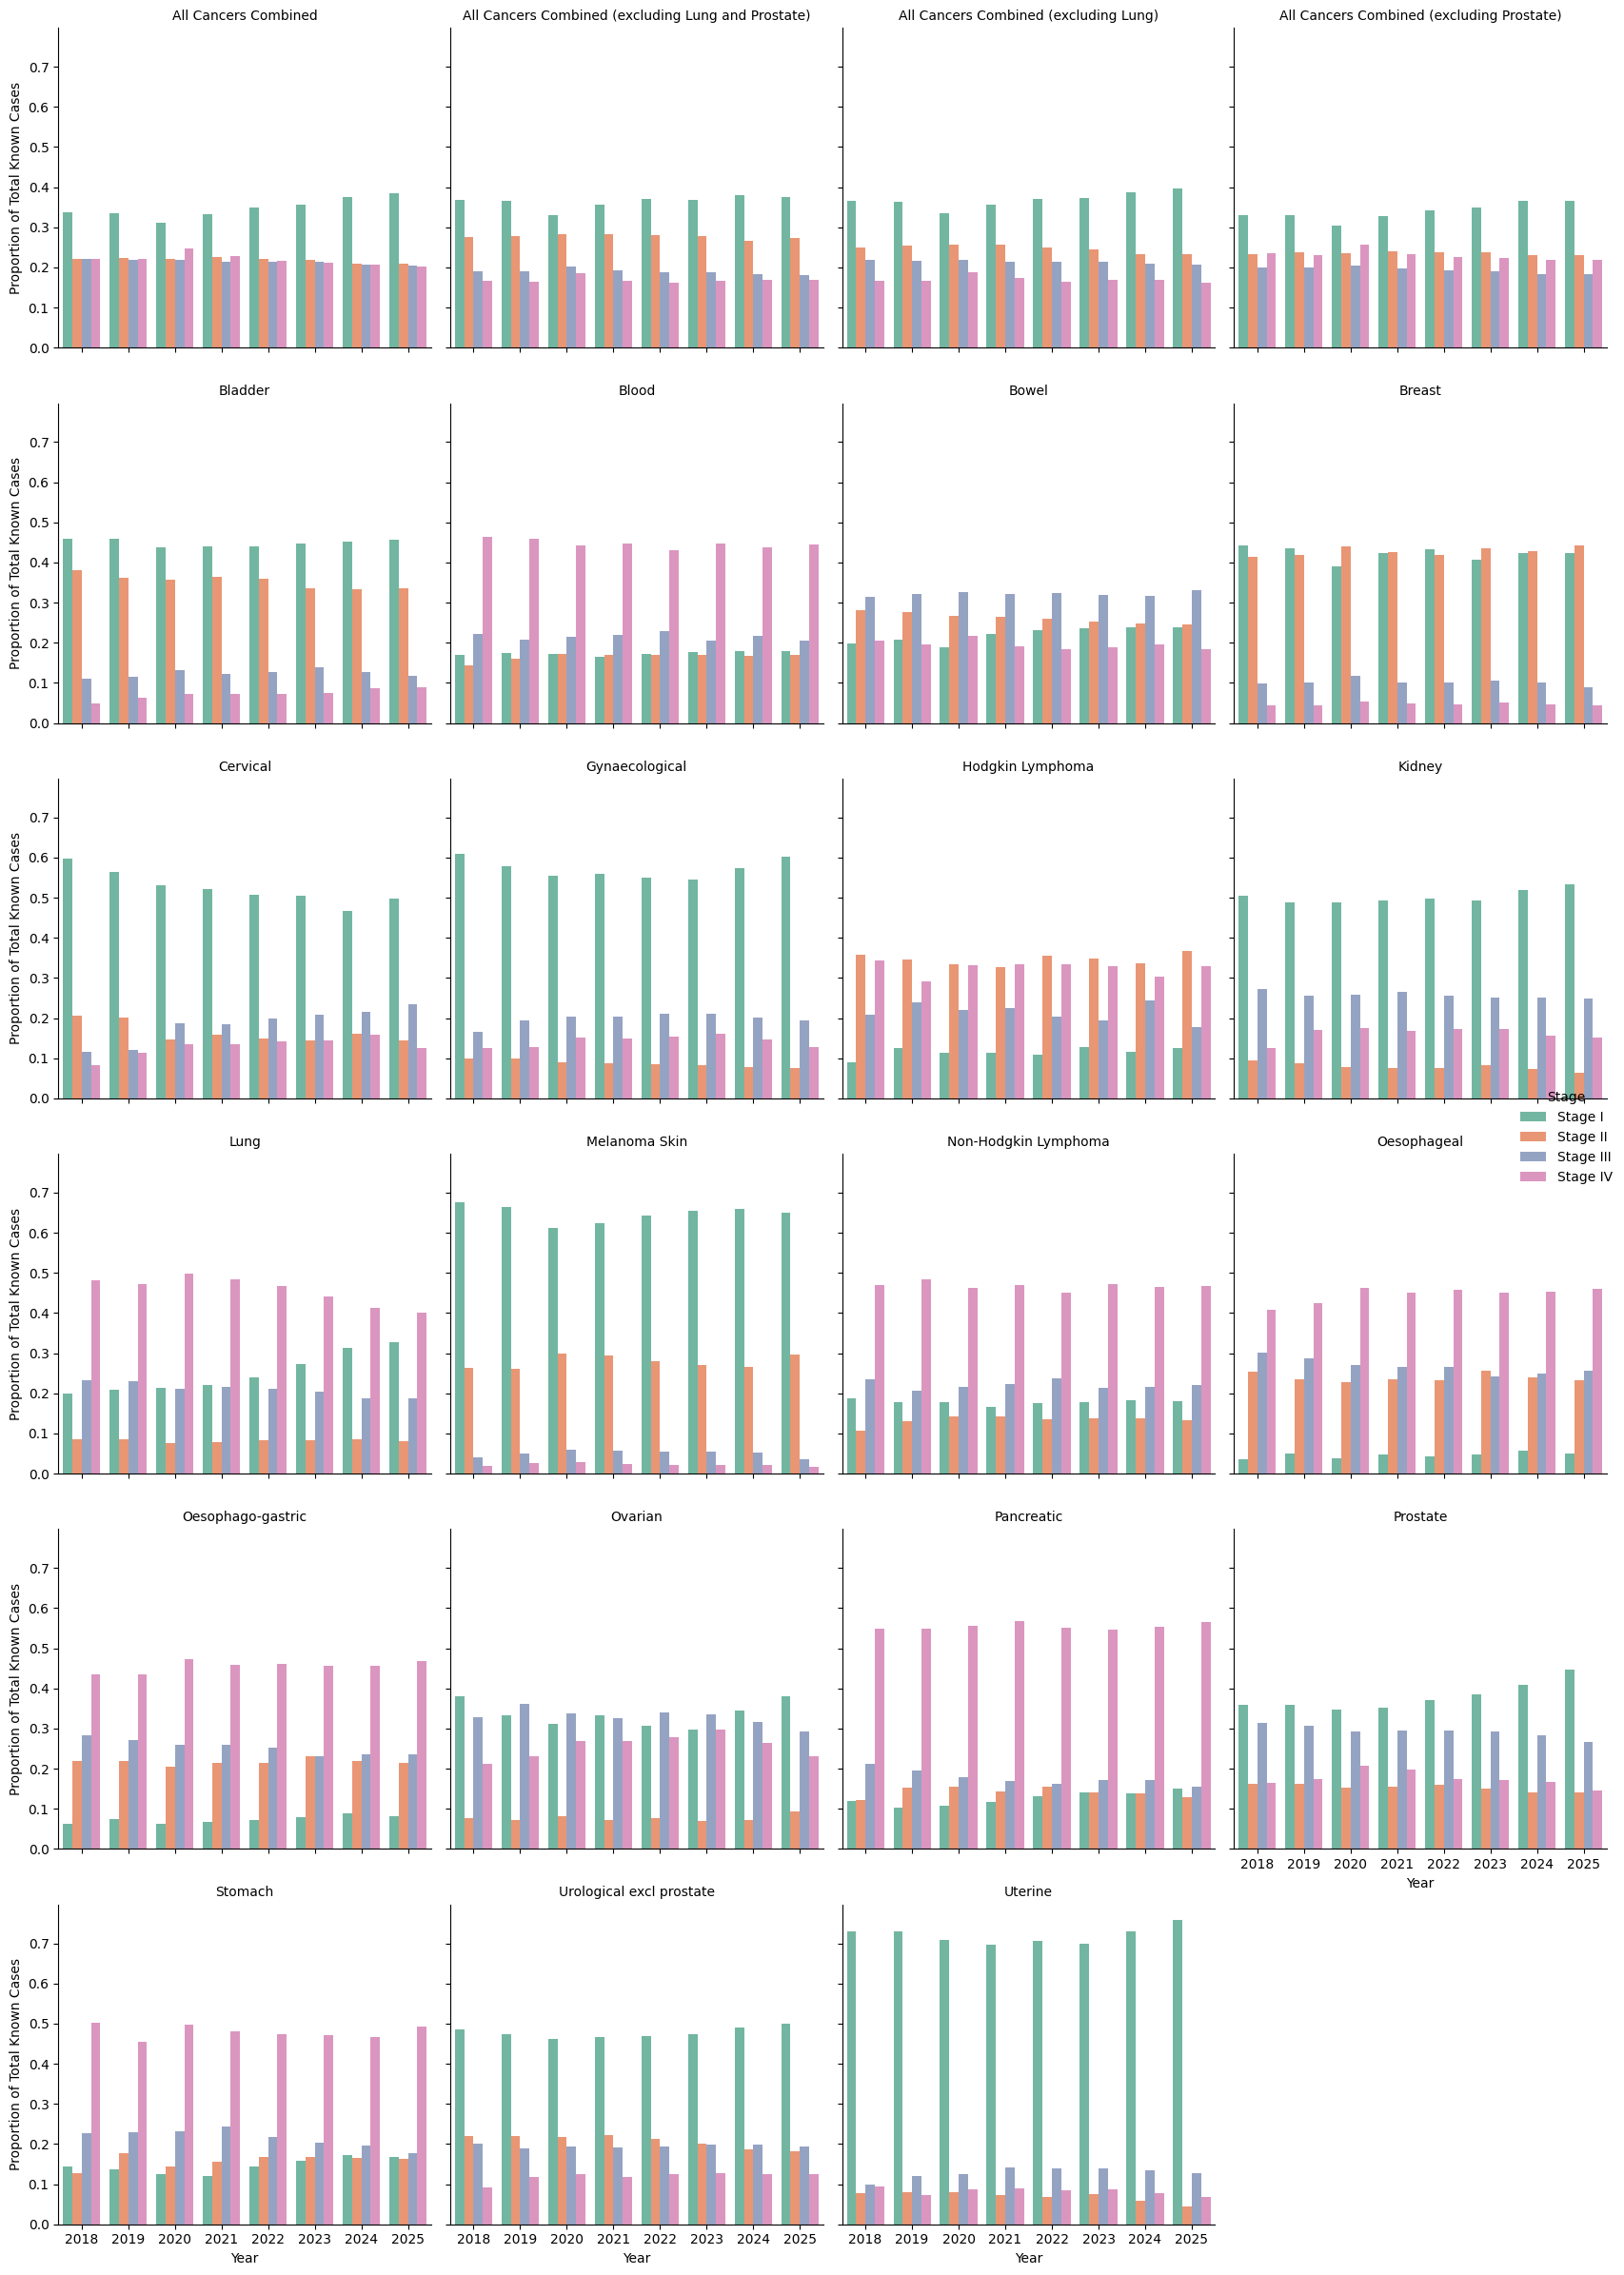

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#reindex the dataframe to turn the multiindex into columns (multiindex came from groupby of df)
df_stage_proportions = df_stage_props.reset_index()
# Melt the dataframe so each row is a single stage per site/year
df_melted = df_stage_proportions.melt(id_vars=['Cancer Site', 'Year'], 
                          value_vars=['Stage I', 'Stage II', 'Stage III', 'Stage IV'],
                          var_name='Stage', value_name='Proportion')

# Plot using seaborn's FacetGrid (This creates a grid of subplots as the function maps to each subplot)
g = sns.FacetGrid(df_melted, col="Cancer Site", col_wrap=4, height=4, sharey=True)
g.map_dataframe(sns.barplot, x="Year", y="Proportion", hue="Stage", palette="Set2")

g.add_legend(title="Stage")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Proportion of Total Known Cases")
plt.tight_layout()
plt.show()


**Pre-process data for ***unsupervised ML model K-N clustering*** to see what patterns exist in addition to those visualised already in subplots**

No need to use one-hot encoding for categoricalvariables because reshaping df makes categorical data columns
No need to use Standard Scaler because incidence (range 2000 to 20,000) has been converted to proportions

In [37]:
print(df_stage_props.head())
Sites_to_exclude = ['All Cancers Combined', 'All Cancers Combined (excluding Lung and Prostate)', 'All Cancers Combined (excluding Lung)', 'All Cancers Combined (excluding Prostate)']
df_stage_props= df_stage_props.drop(Sites_to_exclude, level='Cancer Site', errors='ignore')

print(df_stage_props.head())

Stage                                                     Stage I  Stage II  Stage III  Stage IV  Cluster
Year Cancer Site                                                                                         
2018 All Cancers Combined (excluding Lung and Prostate)  0.368287  0.275942   0.189429  0.166343        0
     All Cancers Combined (excluding Lung)               0.366241  0.249603   0.218345  0.165811        0
     All Cancers Combined (excluding Prostate)           0.331308  0.234356   0.198842  0.235495        0
     Bladder                                             0.459302  0.380814   0.110465  0.049419        0
     Blood                                               0.169725  0.144495   0.222477  0.463303        1
Stage              Stage I  Stage II  Stage III  Stage IV  Cluster
Year Cancer Site                                                  
2018 Bladder      0.459302  0.380814   0.110465  0.049419        0
     Blood        0.169725  0.144495   0.222477  0.463303

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_stage_props[['Stage I', 'Stage II', 'Stage III', 'Stage IV']].copy()


#Choose number of clusters (e.g., 2 for early vs late) 
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

#Add cluster labels back to the DataFrame
df_stage_props['Cluster'] = clusters

#Evaluate with Silhouette Score 
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.556


* Silhouette score of 0.556 is acceptable for cluster designation but let's try different n_clusters to see if a better fit can be achieved.*

In [39]:
scores = {}

for k in range(2, 6):  # 6 is exclusive
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores[k] = score
    print(f"n_clusters = {k}, Silhouette Score = {score:.3f}")

n_clusters = 2, Silhouette Score = 0.556
n_clusters = 3, Silhouette Score = 0.431
n_clusters = 4, Silhouette Score = 0.511
n_clusters = 5, Silhouette Score = 0.478


*n_clusters=2 gives the best silhouette score of 0.556 and 2 clusters aligns with identifying Early and late stages*


Plot K Means clusters after Principal Component Analysis (PCA) to reduce the dimensions (features) to 2.PCA component 1 & 2 are the two principal components with the most variance in the dataset.

[[ 0.25084579  0.20829253]
 [-0.25438562 -0.05300067]
 [-0.07641703  0.1274714 ]
 [ 0.24331934  0.24604835]
 [ 0.32739099 -0.00243342]
 [ 0.30076793 -0.12030991]
 [-0.23090753  0.20137374]
 [ 0.2060475  -0.10658149]
 [-0.2476494  -0.12201529]
 [ 0.44181008  0.05448101]
 [-0.24655115 -0.09665169]
 [-0.33018016  0.09329119]
 [-0.32235282  0.04873685]
 [ 0.04854823 -0.11728886]
 [-0.34620504 -0.08135135]
 [ 0.06744152 -0.01658268]
 [-0.30098293 -0.07290358]
 [ 0.22583006  0.03246429]
 [ 0.42021702 -0.15929356]
 [ 0.23977207  0.1861856 ]
 [-0.24585597 -0.03625946]
 [-0.0662376   0.12152174]
 [ 0.2395606   0.25261347]
 [ 0.28280971 -0.00634149]
 [ 0.27204079 -0.11576312]
 [-0.17619962  0.19041556]
 [ 0.16714257 -0.11800653]
 [-0.2328941  -0.1217438 ]
 [ 0.42670242  0.05199357]
 [-0.26054042 -0.07343804]
 [-0.32754642  0.06879161]
 [-0.31215074  0.04581962]
 [-0.00369526 -0.11485487]
 [-0.35606506 -0.04781485]
 [ 0.06117881 -0.01893466]
 [-0.27401447 -0.01108372]
 [ 0.2022348   0.02896929]
 

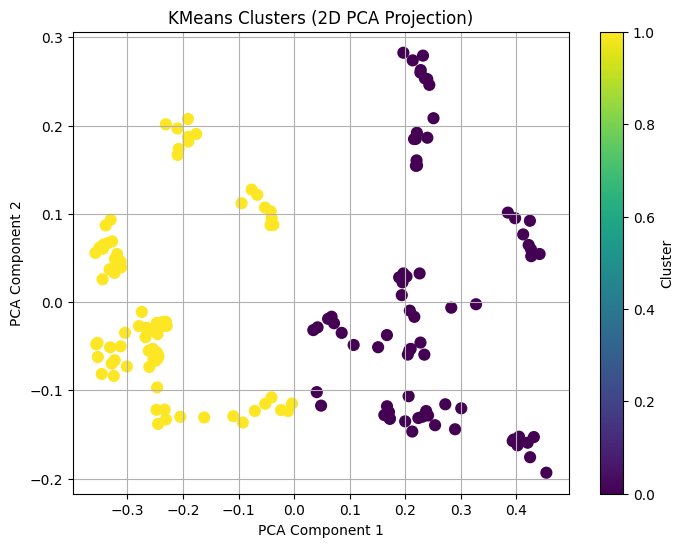

In [40]:
from sklearn.decomposition import PCA
#Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
pca_result=X_pca
print(pca_result)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=60)
plt.title("KMeans Clusters (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

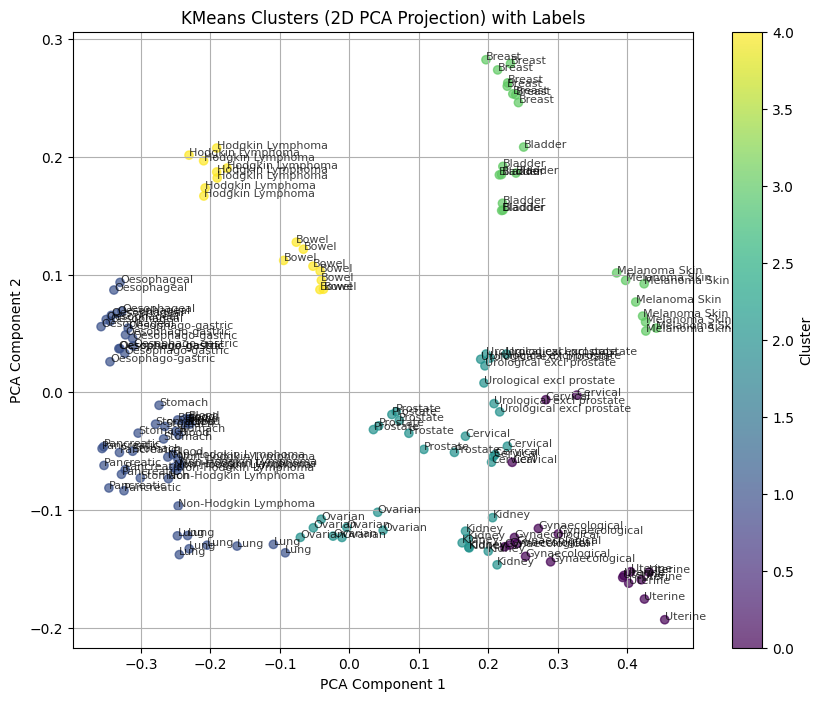

In [41]:

# pca_result: 2D array with PCA components (shape: n_samples x 2)
# labels: list/array with cluster labels (0,1,...)
# names: list/array with names for each point (e.g., cancer site names)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.7)

names = df_stage_props.index.get_level_values('Cancer Site')

for i, name in enumerate(names):
    plt.text(pca_result[i, 0], pca_result[i, 1], name, fontsize=8, alpha=0.75)

plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters (2D PCA Projection) with Labels')
plt.grid(True)
plt.show()


Plot cluster centres only with labels for most common cancer sites at the centres

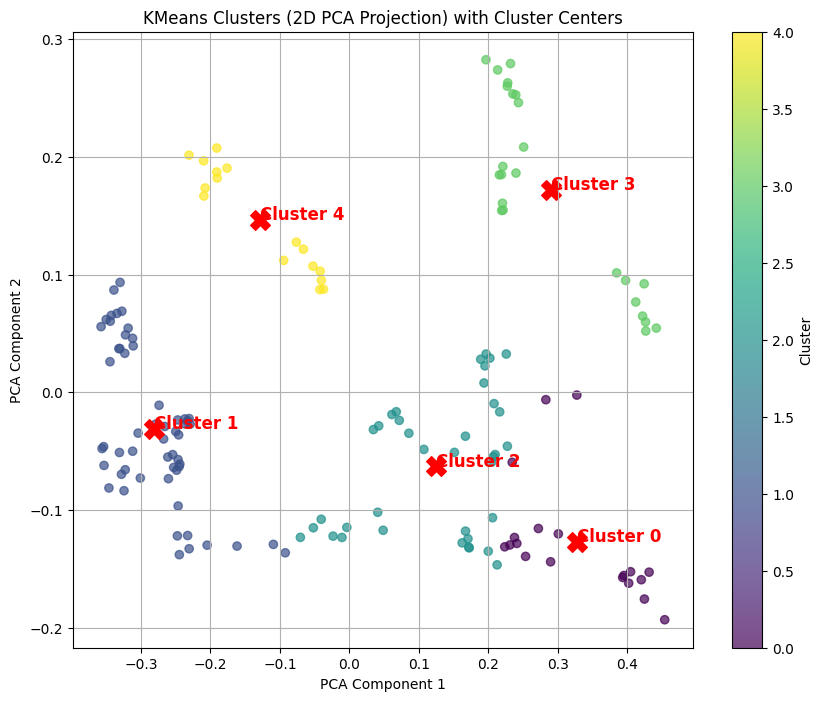

In [42]:
import numpy as np

# Plot the points colored by cluster
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Calculate and plot cluster centers
unique_labels = np.unique(labels)
for label in unique_labels:
    # Find points in this cluster
    cluster_points = pca_result[labels == label]
    # Calculate centroid
    centroid = cluster_points.mean(axis=0)
    # Plot centroid
    plt.scatter(centroid[0], centroid[1], s=200, c='red', marker='X')
    # Label centroid
    plt.text(centroid[0], centroid[1], f'Cluster {label}', fontsize=12, fontweight='bold', color='red')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters (2D PCA Projection) with Cluster Centers')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


Plot K Means Cluster again with PCA-reduced 2D data (n_samples x 2) and labeling cluster centres with most common cancers from df_stage_props: original DataFrame with MultiIndex ['Cancer Site']

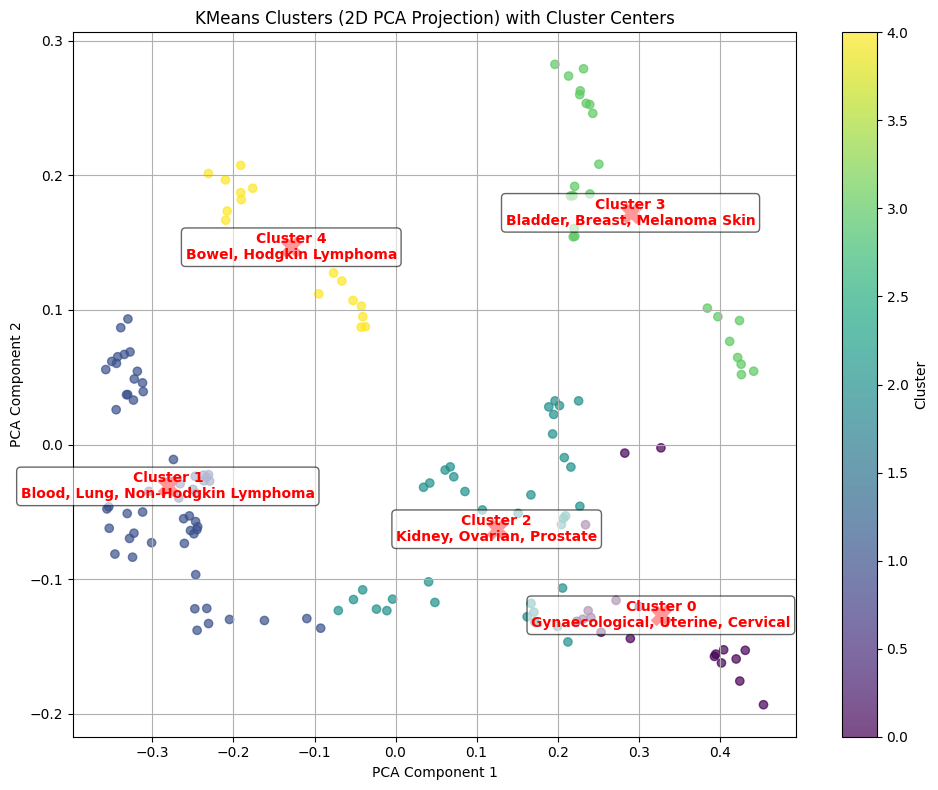

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = df_stage_props.index.get_level_values('Cancer Site')
unique_labels = np.unique(labels)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Don't label each point anymore
# for i, name in enumerate(names):
#     plt.text(pca_result[i, 0], pca_result[i, 1], name, fontsize=8, alpha=0.75)

# Plot and label centroids with representative cancer site names
for label in unique_labels:
    # Points in this cluster
    cluster_points = pca_result[labels == label]
    cluster_names = names[labels == label]

    # Get centroid
    centroid = cluster_points.mean(axis=0)

    # Get top 3 most frequent cancer sites in this cluster
    name_counts = pd.Series(cluster_names).value_counts()
    top_names = name_counts.head(3).index.tolist()
    top_names_str = ', '.join(top_names)

    # Plot centroid
    plt.scatter(centroid[0], centroid[1], s=200, c='red', marker='X')

    # Label centroid with representative names
    plt.text(centroid[0], centroid[1], f'Cluster {label}\n{top_names_str}',
             fontsize=10, fontweight='bold', color='red',
             ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.6))

plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters (2D PCA Projection) with Cluster Centers')
plt.grid(True)
plt.tight_layout()
plt.show()



 **Good clustering performance— minimal overlap between clusters in 2D space. Aligns well with staging information shown in bar plots of stage proportions**
 
Cluster 0:
	Gynaecological, Uterine, Cervical cancers
		Female reproductive system cancers, suggesting shared traits.
		
		**Much higher incidence of stage 1 than any other stage in this cluster suggesting perhaps poor diagnostic tools for stages other than 1**

		
Cluster 1:
	Blood, Lung, Non-Hodgkin Lymphoma
	    Systemic or hematological (not one organ)
		
		**Much higher incidence of stage 4**

Cluster 2:
	Kidney, Ovarian, Prostate
        Reproductive and urologicaL
		
		**Higher incidence of stage 1 but then curious low incidence of stage 2 compared to other stages suggesting difficulty discerning between stage 1 &2**

Cluster 3:
	Bladder, Breast, Melanoma Skin
	    Diverse group; difficult to group in biological terms 
        
		**Higher incidence of Stage 1 and then stage 2 compared to 3&4 perhaps suggesting earlier diagnosis due to better awareness or better screening** 

Cluster 4:
		Bowel, Hodgkin Lymphoma
		Digestive and lymphatic systems link possibly
		
		**Higher incidence of stages compared to stage 1 suggesting need for better diagnostic tools for early diagnosis possibly**

POTENTIAL IDEAS FROM CLUSTER ANALYSIS 

o	Diagnosing cancers in the same cluster might need development of better staging

o	Biomarker discovery: shared markers could exist within a cluster

o	Treatment: or may respond to similar therapies

o	Patient stratification in clinical trials.

LIMITATIONS TO INTERPRETATIONS

Between cluster 1 and cluster 4 are cancers that appear to be a sub cluster: stomach, oeasophaegal-gastric and pancreatic (bowel is in cluster 4 close by). CLuster 1 and 4 and these cancers of the digestive system all do have a much higher incidence of stage 4 but perhaps they could be subdivided better based on underlying biology.
This suggest that labeling of clusters could be expanded as the final PCA 1 vs PCA2 plot limited cluster labeling to 3 most common. More fundamentally, the fact that bowel cancer is in cluster 1 rather than s eperate cluster with theother digetsive system cancers suggests the PCA reduction may have lost too much dimensionality!! Or KMeans clustering may not be the best model as it assumes sphercal clusters, which may not reveal biological complexity.
